In [1]:
# Importando a biblioteca que permite conectar ao MySQL
import mysql.connector

In [2]:
# Acedendo a base de dados em SQL da ATP
gui = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='atp'
)
cursor = gui.cursor()

In [ ]:
cursor.execute("""
    SELECT 
        (SELECT name FROM player WHERE id = g.player1 LIMIT 1) AS player1Name,
        (SELECT name FROM player WHERE id = g.player2 LIMIT 1) AS player2Name,
        (SELECT Height FROM player WHERE id = g.player1 LIMIT 1) AS player1Height,
        (SELECT Height FROM player WHERE id = g.player2 LIMIT 1) AS player2Height,
        (SELECT h.Hand FROM player p, hand h WHERE id = g.player1 AND p.hand = id_Hand LIMIT 1) AS player1Hand,
        (SELECT h.Hand FROM player p, hand h WHERE id = g.player2 AND p.hand = id_Hand LIMIT 1) AS player2Hand,
        (SELECT b.Backhand FROM player p, backhand b WHERE id = g.player1 AND p.backhand = id_backhand LIMIT 1) AS player1Backhand,
        (SELECT b.Backhand FROM player p, backhand b WHERE id = g.player2 AND p.backhand = id_backhand LIMIT 1) AS player2Backhand,
        (SELECT country FROM player, country WHERE id = g.player1 AND born = code_country LIMIT 1) AS player1Born,
        (SELECT country FROM player, country WHERE id = g.player2 AND born = code_country LIMIT 1) AS player2Born,
        (SELECT continent FROM player, continent_country cc, continent c WHERE id = g.player1 AND born = three_letter_country_code AND cc.continent_code = c.continent_code LIMIT 1) AS player1Continent,
        (SELECT continent FROM player, continent_country cc, continent c WHERE id = g.player2 AND born = three_letter_country_code AND cc.continent_code = c.continent_code LIMIT 1) AS player2Continent,

        (SELECT YEAR(s.start) - YEAR(p.birthdate) - (DATE_FORMAT(s.start, '%m%d') < DATE_FORMAT(p.birthdate, '%m%d')) FROM player p WHERE p.id = g.player1 LIMIT 1) AS player1Age,
        (SELECT YEAR(s.start) - YEAR(p.birthdate) - (DATE_FORMAT(s.start, '%m%d') < DATE_FORMAT(p.birthdate, '%m%d')) FROM player p WHERE p.id = g.player2 LIMIT 1) AS player2Age,

        RankPlayer1, RankPlayer2, GameRound, tournament, start, end, ground, prize,
        g.Score
    FROM game g
    JOIN season s ON g.id_season = s.id_season
    WHERE location = 'AUT' AND Released = 1
""")


Foi feito o select da base de dados SQL de todas as colunas que se achou relevante para se realizar o estudo desejado.

In [5]:
# Criação de um dicionário para de seguida preencher com os dados
# obtidos na célula anterior e por fim colocar num DataFrame do pandas
# O dicionário começa com listas vazias
cols = "player1Name player2Name player1Height player2Height player1Hand player2Hand player1Backhand player2Backhand player1Born player2Born player1Continent player2Continent player1Age player2Age player1Rank player2Rank GameRound tournament start end ground prize Score"
cols = cols.split()
data = dict()
for col in cols:
    data[col] = list()
data

{'player1Name': [],
 'player2Name': [],
 'player1Height': [],
 'player2Height': [],
 'player1Hand': [],
 'player2Hand': [],
 'player1Backhand': [],
 'player2Backhand': [],
 'player1Born': [],
 'player2Born': [],
 'player1Continent': [],
 'player2Continent': [],
 'player1Age': [],
 'player2Age': [],
 'player1Rank': [],
 'player2Rank': [],
 'GameRound': [],
 'tournament': [],
 'start': [],
 'end': [],
 'ground': [],
 'prize': [],
 'Score': []}

In [6]:
# Preenchimento das listas presentes no dicionário com os dados extraídos
# da base de dados
for row in cursor:
    count = 0
    for obs in row:
        data[cols[count]].append(obs)
        count += 1

In [7]:
# Importanto a biblioteca que permite criar e manipular um DataFrame
import pandas as pd

In [8]:
# Transformando o dicionário em DataFrame e de seguida apresentando as primeiras 6 observações deste novo DataFrame
df = pd.DataFrame(data)
df.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Age,player1Rank,player2Rank,GameRound,tournament,start,end,ground,prize,Score
0,Christian Miniussi,Simon Youl,185,185,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,23.0,242,123,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63
1,Christian Miniussi,Todd Woodbridge,185,178,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,18.0,0,246,Round of 16,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",62 64
2,Cyril Suk,Mansour Bahrami,180,178,Right-Handed,Right-Handed,Unknown,Unknown,Czech Republic\r,Iran\r,...,33.0,193,387,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62
3,Eric Winogradsky,Gustavo Giussani,188,180,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Argentina\r,...,21.0,165,185,Semi-Finals,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75
4,Eric Winogradsky,Michael Tauson,188,193,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Denmark\r,...,22.0,165,180,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63


In [9]:
df.to_csv("atpWithoutHandle.csv", index=False)

Caso não se veja a necessidade de realizar a leitura pelo SQL basta retirar o comentário da célula a seguir, rodar ela e dar seguimento neste estado.

In [11]:
# df = pd.read_csv("atpWithoutHandle.csv")

In [12]:
# Verificando o shape do DataFrame
df.shape

(10894, 23)

In [13]:
# Verificando o número de registos duplicados no DataFrame
df.duplicated().sum()

0

In [14]:
# Visualização das informações sobre as variáveis selecionadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10894 entries, 0 to 10893
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player1Name       10894 non-null  object 
 1   player2Name       10894 non-null  object 
 2   player1Height     10894 non-null  int64  
 3   player2Height     10894 non-null  int64  
 4   player1Hand       10894 non-null  object 
 5   player2Hand       10894 non-null  object 
 6   player1Backhand   10894 non-null  object 
 7   player2Backhand   10894 non-null  object 
 8   player1Born       10894 non-null  object 
 9   player2Born       10894 non-null  object 
 10  player1Continent  10894 non-null  object 
 11  player2Continent  10894 non-null  object 
 12  player1Age        10293 non-null  float64
 13  player2Age        9870 non-null   float64
 14  player1Rank       10894 non-null  int64  
 15  player2Rank       10894 non-null  int64  
 16  GameRound         10894 non-null  object

In [15]:
# Criação da variável alvo `Sets`
df["Sets"] = [len(str(obs).split()) for obs in df["Score"]]

In [16]:
# Verificando as 6 últimas observações por terem mais variações no número de sets
df.tail()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player1Rank,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets
10889,Thomas Schiessling,Zbynek Mlynarik,180,175,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Austria\r,...,0,687,Quarter-Finals,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",61 62,2
10890,Thomas Wild,Michael Lukas,0,0,Unknown,Unknown,Unknown,Unknown,Austria\r,Austria\r,...,0,0,Round of 32,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",75 57 63,3
10891,Thomas Wild,Tamas Gyorgy,0,0,Unknown,Right-Handed,Unknown,Unknown,Austria\r,Hungary\r,...,0,955,Round of 16,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",63 16 63,3
10892,Zbynek Mlynarik,Martin Spottl,175,180,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Austria\r,...,687,635,Round of 32,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",63 20 (RET),3
10893,Zbynek Mlynarik,Rodrigo Ferreiro,175,0,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Brazil\r,...,687,833,Round of 16,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",63 16 63,3


In [17]:
# Estatística descritiva dos dados numéricos
round(df.describe(), 2)

,player1Height,player2Height,player1Age,player2Age,player1Rank,player2Rank,Sets
count,10894.00,10894.00,10293.00,9870.00,10894.00,10894.00,10894.00
mean,152.31,126.35,23.48,23.31,307.85,417.45,2.30
std,70.55,85.86,3.92,4.08,368.51,455.41,0.57
min,0.00,0.00,-12.00,-4.00,0.00,0.00,0.00
25%,175.00,0.00,21.00,20.00,14.00,62.00,2.00
50%,183.00,180.00,23.00,23.00,138.00,222.00,2.00
75%,188.00,185.00,26.00,26.00,516.00,678.00,3.00
max,510.00,510.00,54.00,54.00,2233.00,2233.00,6.00


Remover registos com `RET`, `W/O` e `DEF`

Para tal será necessário criar uma variável onde estará apenas o resultado do último set que, em geral, é onde aparece sempre este "resultado"

In [19]:
import numpy as np

In [20]:
df["LastScore"] = [str(obs).split()[-1] if len(str(obs).split()) > 0 else np.nan for obs in df["Score"]]

In [21]:
value_counts = df["LastScore"].value_counts()

print(value_counts)

64        2131
63        2064
62        1858
61        1283
76        1098
75         766
60         545
null       392
(RET)      315
46          93
26          75
36          67
(W/O)       54
16          53
67          37
57          29
06          18
(DEF)        4
10-5         2
10-8         2
13-11        1
10-862       1
12-10        1
20           1
41           1
97           1
Name: LastScore, dtype: int64


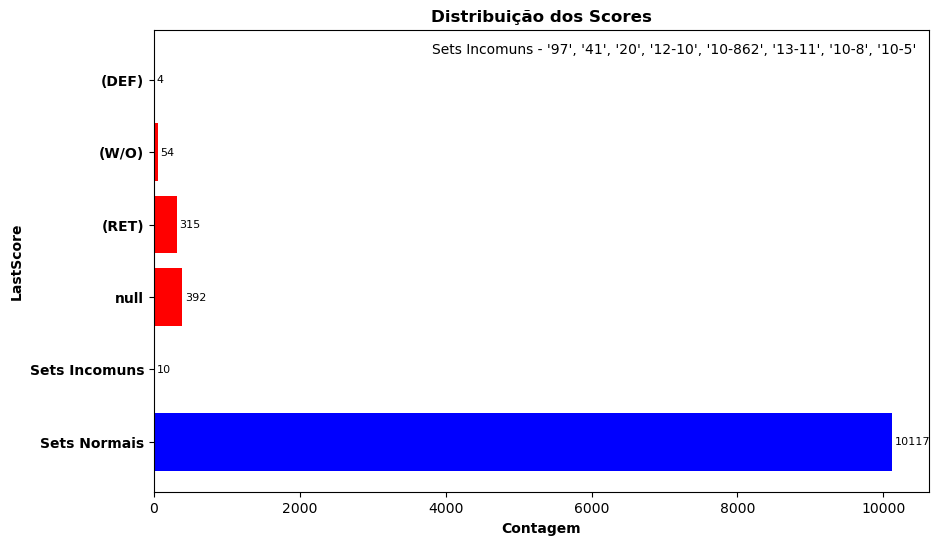

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = df['LastScore'].value_counts()

# Definindo os valores destacados (valores específicos mencionados)
nulo = 'null'
highlighted_values = ['null', '(RET)', '(W/O)', '(DEF)']
incommon_values = ['97', '41', '20', '12-10', '10-862', '13-11', '10-8', '10-5']

# Dividindo os valores em grupos
normal_sets = [x for x in value_counts.index if x not in highlighted_values and x not in incommon_values]
uncommon_sets = incommon_values  # Sets Incomuns com os valores que você especificou

# Somando as contagens para cada grupo
normal_sets_count = value_counts[normal_sets].sum()
uncommon_sets_count = value_counts[uncommon_sets].sum()

# Criando um DataFrame para os Sets Especiais (cada um em uma barra separada)
try:
    special_sets_count = value_counts[highlighted_values]
except:
    nulo = 'nan'
    highlighted_values[0] = nulo
    special_sets_count = value_counts[highlighted_values]

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Plotando as barras para "Sets Normais" e "Sets Incomuns"
ax.barh('Sets Normais', normal_sets_count, color='blue')
ax.barh('Sets Incomuns', uncommon_sets_count, color='red')

# Plotando as barras individuais para cada um dos valores destacados
for special_set in special_sets_count.index:
    ax.barh(special_set, special_sets_count[special_set], color='red')

# Adicionando os valores à frente de cada barra de "Sets Normais"
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 35, 
            p.get_y() + p.get_height()/2, 
            str(int(width)), 
            va='center', 
            color='black',
            fontsize=8)  # <- tamanho menor do texto

    
# Criando a legenda personalizada para "Sets Incomuns"
legend_label = "Sets Incomuns - '97', '41', '20', '12-10', '10-862', '13-11', '10-8', '10-5'"

# Criando uma legenda personalizada sem associar a cor azul
ax.legend([plt.Line2D([0], [0], color='none', lw=0)], [legend_label], loc="upper right", frameon=False)

# Adicionando título e rótulos aos eixos
plt.title("Distribuição dos Scores", fontweight='bold')
plt.xlabel("Contagem", fontweight='bold')
plt.ylabel("LastScore", fontweight='bold')


plt.show()

Casos verificados em `LastScore`

- (392) casos com o valor `null`
- (315) casos com o valor `(RET)`, importante destacar o que significa este resultado e o motivo destes números de acordo ao significado
- (54) casos com o valor `(W/O)`, importante destacar quais casos são estes
- (4) casos com o valor `(DEF)`, o mesmo caso que o anterior
- (7) casos com valores da forma (10-5, 10-8, 13-11, 10-862 e 12-10), 2 de cada um dos 2 primeiros e os restantes apenas uma ocorrência
- Temos três partidas onde os resultados do último set foram (20, 41 e 97), é suposto isto acontecer?

#### Olhando para os casos com (RET)

In [25]:
df.loc[df["LastScore"] == "(RET)", "Sets"].value_counts()

3    156
2    111
4     46
6      1
1      1
Name: Sets, dtype: int64

- Temos o registo de um jogo que devia ser a melhor de 5, porém no último ser houve um (RET) e o jogo ficou com um score a mais;
- Temos o registo de um jogo que não chegou a começar e houve logo um (RET);
- Houve também 313 jogos onde ocorreu um (RET) a meio do jogo.

In [27]:
df.loc[df["Sets"] == 6]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
7582,Gilbert Schaller,Goran Ivanisevic,180,193,Right-Handed,Left-Handed,Unknown,Two-Handed,Austria\r,Croatia\r,...,5,Round Robin,CRO V AUT EAZ,1997-03-31,1997-04-06,Clay,,63 64 67 26 31 (RET),6,(RET)


In [28]:
df.loc[(df["Score"] == "46 61 (RET)")]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
5488,Jurgen Melzer,Juan Antonio Marin,183,175,Left-Handed,Right-Handed,Two-Handed,Two-Handed,Austria\r,Costa Rica\r,...,104,Round of 16,Linz,2001-08-06,2001-08-12,Clay,"$50,000",46 61 (RET),3,(RET)


In [29]:
df.loc[(df["Sets"] == 3) & (df["LastScore"] == "(RET)"), "Score"].value_counts()

63 30 (RET)      9
61 20 (RET)      8
64 10 (RET)      7
61 30 (RET)      6
61 10 (RET)      5
                ..
57 24 (RET)      1
36 21 (RET)      1
76,  30 (RET)    1
75 40 (RET)      1
63 50 (RET)      1
Name: Score, Length: 81, dtype: int64

Será que não existem casos em que o jogo terminou, mas, um dos jogadores acabou sendo desclassificados por algum acontecimento pós-jogo?
- Acredito que não seja este o caso no jogo com 6 sets.
- Será que o caso não será o mesmo para os jogos com 4 sets?

Os jogos com 4 sets e com `(RET)` sendo o quarto podem ser eliminados, nenhum deles terminou. Em caso de pontos aqueles em que o jogo estava 50 os sets anteriores apresentavam um empate.

Com isso, estes registos podem ser eliminados.

Não há nada que nos leve a não eliminar os casos com 3 e 2 sets sendo o último o (RET). A NÃO SER QUE SAIBAMOS A MELHOR DE QUANTOS É QUE O JOGO SERIA E CASO OS 2 PRIMEIROS SETS TINHAM SIDO COMPLETOS E VITORIOSOS APENAS PARA UM JOGADOR PODERA SE ASSUMIR A CONSLUSAO DO JOGO COM 2 SETS, CONTUDO ISSO NÃO SE VERIFICA.

**Todos os registos com `(RET)` devem ser eliminados!**

#### Olhando para os casos com (W/O)

In [32]:
df.loc[df["LastScore"] == "(W/O)", "Sets"].value_counts()

1    54
Name: Sets, dtype: int64

In [33]:
df.loc[df["LastScore"] == "(W/O)"]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
32,Christian Lindell,Lukas Jastraunig,193,0,Right-Handed,Unknown,Two-Handed,Unknown,Sweden\r,Austria\r,...,677,Round of 32,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",(W/O),1,(W/O)
103,Fabio Maggi,Fredrik Jonsson,175,193,Right-Handed,Right-Handed,Unknown,Unknown,Italy\r,Sweden\r,...,409,Quarter-Finals,Portschach,1997-07-14,1997-07-20,Clay,"$25,000",(W/O),1,(W/O)
121,Roland Burtscher,Jordi Mas,183,0,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Spain\r,...,339,Round of 16,Portschach,1997-07-14,1997-07-20,Clay,"$25,000",(W/O),1,(W/O)
248,Marco Mirnegg,Lukas Vojtechovsky,180,0,Right-Handed,Left-Handed,Unknown,Unknown,Austria\r,Czech Republic\r,...,0,Round of 16,Austria F9,2009-08-31,2009-09-06,Clay,"$10,000",(W/O),1,(W/O)
278,Jonas Svensson,Christian Bergstrom,188,180,Right-Handed,Right-Handed,Unknown,Unknown,Sweden\r,Sweden\r,...,58,Round of 16,Vienna,1988-10-17,1988-10-23,Carpet,"$180,000",(W/O),1,(W/O)
301,Andy Murray,David Ferrer,191,175,Right-Handed,Right-Handed,Two-Handed,Unknown,United Kingdom\r,Spain\r,...,19,Semi-Finals,Vienna,2016-10-24,2016-10-30,Hard,"$1,884,645",(W/O),1,(W/O)
552,Christian Miniussi,Jerome Potier,185,180,Right-Handed,Left-Handed,Unknown,Unknown,Argentina\r,France\r,...,90,Round of 16,Salzburg,1988-05-09,1988-05-15,Clay,"$75,000",(W/O),1,(W/O)
694,Pavel Snobel,Yves Allegro,191,183,Left-Handed,Right-Handed,Unknown,Unknown,Czech Republic\r,Switzerland\r,...,336,Round of 32,Austria F3,2001-05-14,2001-05-20,Clay,"$15,000",(W/O),1,(W/O)
961,Tobias Koeck,David Novak,0,0,Unknown,Unknown,Unknown,Unknown,Austria\r,Czech Republic\r,...,587,Round of 16,Austria F10,2007-08-27,2007-09-02,Clay,"$10,000",(W/O),1,(W/O)
1059,Zbynek Mlynarik,Thomas Schiessling,175,180,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Austria\r,...,448,Round of 32,Austria F6,1998-07-20,1998-07-26,Clay,"$10,000",(W/O),1,(W/O)


Todos os casos com `W/O` têm apenas este como o resultado, o que faz sentido porque é uma vitória fácil, onde o jogo nem sequer é realizado.

Em geral,  acontece por falta de comparência da equipa adversária.

**Podemos eliminar os registos com `(W/O)` sem porblemas**

#### Olhando para os casos com (DEF)

In [36]:
df.loc[df["LastScore"] == "(DEF)"]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
2961,Dominic Weidinger,Lukas Koncilia,0,0,Right-Handed,Unknown,Two-Handed,Unknown,Austria\r,Austria\r,...,1428,Round of 32,Austria F3,2013-07-08,2013-07-14,Clay,"$10,000",62 21 (DEF),3,(DEF)
6592,Nicolas Reissig,Karel Triska,185,0,Right-Handed,Unknown,One-Handed,Unknown,Austria\r,Czech Republic\r,...,801,Round of 32,Austria F7,2008-08-18,2008-08-31,Clay,"$10,000",75 (DEF),2,(DEF)
8061,Gerald Kamitz,Denis Bejtulahi,0,0,Unknown,Right-Handed,Unknown,Unknown,Austria\r,Serbia\r,...,1425,Round of 16,Austria F4,2006-06-26,2006-07-02,Clay,"$10,000",36 55 (DEF),3,(DEF)
8267,Lukas Ollert,Alexander Erler,175,193,Right-Handed,Right-Handed,Two-Handed,Two-Handed,Germany\r,Austria\r,...,677,Round of 32,Austria F2,2018-07-09,2018-07-15,Clay,"$15,000",76 30 (DEF),3,(DEF)


Existem apenas 4 jogos com `(DEF)`. Sendo 1 com dois sets e os restantes com 3 sets.

Não existem possibilidades destes jogos terem sido concluídos e o motivo da aplicação desta opção ter sido dada pós-jogo.

Desqualificação de um jogador num encontro pelo árbitro de cadeira, após o jogador ter recebido quatro advertências por violação do código, geralmente devido à sua conduta em campo.

Uma desqualificação pode ocorrer com menos de quatro advertências, se a violação for considerada suficientemente grave para a justificar.

Uma dupla desqualificação ocorre quando ambos os jogadores são desqualificados.

Também ocorrem desqualificações quando um jogador falta a um encontro sem justificação válida.

As desqualificações são consideradas derrotas.

**Podemos eliminar os registos com `(DEF)` sem porblemas**

In [38]:
# Eliminando os registos com (RET), (W/O) e (DEF)
before_delete = df.shape[0]
df = df.loc[df["LastScore"] != "(RET)"]
df = df.loc[df["LastScore"] != "(W/O)"]
df = df.loc[df["LastScore"] != "(DEF)"]

after_delete = df.shape[0]

print(f"Before delete: {before_delete}")
print(f"After delete: {after_delete}")
print(f"Deleted: {before_delete - after_delete}")

Before delete: 10894
After delete: 10521
Deleted: 373


In [39]:
df['LastScore'].value_counts()

64        2131
63        2064
62        1858
61        1283
76        1098
75         766
60         545
null       392
46          93
26          75
36          67
16          53
67          37
57          29
06          18
10-5         2
10-8         2
13-11        1
10-862       1
12-10        1
20           1
41           1
97           1
Name: LastScore, dtype: int64

Depois de elinarmos os registos com `(RET)`, `(W/O)` e `(DEF)` deparamo-nos com mais problemas por resolver.
- (392) obs com `LastScore=null`;
- (7) obs com o score num formato estranho
- (3) obs com os scores em 20, 41 e 97, é suposto?

Não faz sentido termos valores nulos na variável alvo, logo:

In [42]:
df.loc[df["LastScore"] == nulo, "player2Name"].value_counts()

bye    392
Name: player2Name, dtype: int64

Todos os registos com `LastScore=null` são aqueles em que o `Player1` não precisou jogar sequer pelo facto de estar num rank elevado, para este tipo de registo o `player2` é registado como **bye** e a vitória é dada ao `Player1`

In [44]:
before_delete = df.shape[0]

df = df.loc[df["LastScore"] != nulo]

after_delete = df.shape[0]

print(f"Before delete: {before_delete}")
print(f"After delete: {after_delete}")
print(f"Deleted: {before_delete - after_delete}")

Before delete: 10521
After delete: 10129
Deleted: 392


In [45]:
sets = np.array([len(score.replace(',', '  ').split()) for score in df['Score']])
diff = df['Sets'] - sets
diff.value_counts()

0    10129
Name: Sets, dtype: int64

As vírgulas não interferem em nada no número de sets por jogo!

Mas, importante serem removidas para podermos aplicar a opção de a melhor de...

In [47]:
Score_without_comma = np.array([score.replace(',', '') for score in df['Score']])
df['Score'] = Score_without_comma
df.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
0,Christian Miniussi,Simon Youl,185,185,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,123,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63
1,Christian Miniussi,Todd Woodbridge,185,178,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,246,Round of 16,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",62 64,2,64
2,Cyril Suk,Mansour Bahrami,180,178,Right-Handed,Right-Handed,Unknown,Unknown,Czech Republic\r,Iran\r,...,387,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62
3,Eric Winogradsky,Gustavo Giussani,188,180,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Argentina\r,...,185,Semi-Finals,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75
4,Eric Winogradsky,Michael Tauson,188,193,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Denmark\r,...,180,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63


In [48]:
def xnor(a, b, c):
    A = a == b
    B = b == c
    return A * B == 1

def best_of_5(score):
    s1, s2, s3 = score.split()
    a, b, c = int(s1[0]) > int(s1[1]), int(s2[0]) > int(s2[1]), int(s3[0]) > int(s3[1])
    return xnor(a, b, c)

best_of_5('56, 65, 67')

False

A funções acima foram contruídas para distinguir um jogo que é a melhor de 3 de um a melhor de 5.

A ideia base foi:
- Um jogo a melhor de 3 pode ter apenas 2 e 3 sets;
- Porém, os jogos com 3 sets exigem que haja um empate nos dois primeiros sets;
- Um jogo a melhor de 5 pode ter 3, 4 e 5 sets;
- Para os jogos com 3 sets a melhor de 5 existe a necessidade de todos os jogos serem vencidos por apenas um jogador.

Baseando nestes pontos foram contruídas as funções `xnor` e `best_of_5`.

In [50]:
# Jogos à melhor de 5 mas com 3 sets
count = 0
for score in df.loc[df['Sets'] == 3, 'Score']:
    s1, s2, s3 = score.split()
    a, b, c = int(s1[0]) > int(s1[1]), int(s2[0]) > int(s2[1]), int(s3[0]) > int(s3[1])
    if xnor(a, b, c):
        count += 1
print(f"Existe no dataset {count} registos de jogos que são a melhor de 5.")

Existe no dataset 74 registos de jogos que são a melhor de 5.


In [51]:
df['Sets'].value_counts()

2    6795
3    3253
4      46
5      31
0       2
1       2
Name: Sets, dtype: int64

In [52]:
df.loc[df['Sets'] == 0]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
6378,Jose Francisco Altur,Chris Wilkinson,191,180,Left-Handed,Right-Handed,Unknown,Unknown,Spain\r,United Kingdom\r,...,401,Round of 16,Salzburg,1990-08-13,1990-08-19,Clay,"$100,000",,0,NaN
10727,Joaquin Munoz-Hernandez,Thomas Schiessling,178,180,Right-Handed,Right-Handed,Unknown,Unknown,Spain\r,Austria\r,...,877,Round of 64,Kitzbuhel,1997-07-21,1997-07-27,Clay,"$500,000",,0,NaN


Estes registos serão eliminados por não estarem com os dados completos. Por serem poucos verificamos cada um deles no site da atp e o estado que os temos é o mesmo que encontramos lá no site.

**Eliminamos estes casos**

In [54]:
before_delete = df.shape[0]

df = df.loc[df['Sets'] != 0]

after_delete = df.shape[0]

print(f"Before delete: {before_delete}")
print(f"After delete: {after_delete}")
print(f"Deleted: {before_delete - after_delete}")

Before delete: 10129
After delete: 10127
Deleted: 2


In [55]:
df.loc[df['Sets'] == 1]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
8134,Rogerio Dutra Silva,Jan Hajek,178,180,Right-Handed,Right-Handed,One-Handed,Two-Handed,Brazil\r,Czech Republic\r,...,84,Round of 32,Kitzbuhel,2012-07-23,2012-07-28,Clay,"$358,425",41,1,41
9650,Werner Eschauer,Solon Peppas,188,0,Right-Handed,Right-Handed,Two-Handed,Unknown,Austria\r,Greece\r,...,166,Round of 16,Linz,2000-09-11,2000-09-17,Clay,"$75,000",76,1,76


Rogério Dutra da Silva começou bem sua campanha no ATP 250 de Kitzbuhel, na Áustria. 

O brasileiro vencia o primeiro set por 4/1 quando seu adversário, o tcheco Jan Hajek (84 do mundo), abandonou. 

O resultado coloca Rogerinho, atual número 107 do ranking, nas oitavas de final.

Desta feita este registo vai ser tratado como um `(RET)` e será eliminado.

Quanto ao segundo, as mesmas fontes indicam que ele foi concluído e que houve apenas 2 sets para definir o vencedor, ficando com '76 75', logo, vamos atualizar estes valores.

In [57]:
df.loc[(df['player1Name'] == 'Werner Eschauer') & (df['player2Name'] == 'Solon Peppas')]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
9650,Werner Eschauer,Solon Peppas,188,0,Right-Handed,Right-Handed,Two-Handed,Unknown,Austria\r,Greece\r,...,166,Round of 16,Linz,2000-09-11,2000-09-17,Clay,"$75,000",76,1,76


In [58]:
before_delete = df.shape[0]

df = df.loc[df['Score'] != '41'] # Descartando o registo incompleto

after_delete = df.shape[0]

print(f"Before delete: {before_delete}")
print(f"After delete: {after_delete}")
print(f"Deleted: {before_delete - after_delete}")

df.loc[df['Score'] == '76', ["Score", "Sets", "LastScore"]] = "76 75", 2, "75"

Before delete: 10127
After delete: 10126
Deleted: 1


In [59]:
df['LastScore'].value_counts()

64        2131
63        2064
62        1858
61        1283
76        1097
75         767
60         545
46          93
26          75
36          67
16          53
67          37
57          29
06          18
10-5         2
10-8         2
13-11        1
10-862       1
12-10        1
20           1
97           1
Name: LastScore, dtype: int64

In [60]:
valores = ['97', '20', '12-10', '10-862', '13-11', '10-8', '10-5']
df.loc[df['LastScore'].isin(valores)]


,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,player2Rank,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore
158,Bogdan Ionut Apostol,Alexander Shevchenko,183,185,Right-Handed,Right-Handed,Two-Handed,Two-Handed,Romania\r,Russia\r,...,513,Quarter-Finals,M25 Telfs,2021-07-12,2021-07-18,Clay,"$25,000",46 63 13-11,3,13-11
161,Bogdan Ionut Apostol,Mick Veldheer,183,183,Right-Handed,Left-Handed,Two-Handed,Two-Handed,Romania\r,Netherlands\r,...,566,Round of 16,M25 Telfs,2021-07-12,2021-07-18,Clay,"$25,000",64 57 10-5,3,10-5
167,Filip Misolic,Martins Podzus,180,188,Right-Handed,Right-Handed,Two-Handed,Two-Handed,Austria\r,Latvia\r,...,454,Round of 16,M25 Telfs,2021-07-12,2021-07-18,Clay,"$25,000",36 76 10-5,3,10-5
1129,Stefan Koubek,Magnus Gustafsson,175,185,Left-Handed,Right-Handed,Unknown,Unknown,Austria\r,Sweden\r,...,70,Round Robin,"AUT v SWE, WGPO",1999-09-20,1999-09-26,Clay,,64 46 64 46 10-8,5,10-8
4406,Thomas Muster,Shlomo Glickstein,180,188,Left-Handed,Right-Handed,One-Handed,Unknown,Austria\r,Israel\r,...,103,Round Robin,AUT vs. ISR - EUROPE ZONE B SF,1985-07-29,1985-08-04,Clay,,36 10-862,2,10-862
4468,Thomas Muster,Michael Stich,180,193,Left-Handed,Right-Handed,One-Handed,One-Handed,Austria\r,Germany\r,...,2,Round Robin,GER V AUT 1RD,1994-03-21,1994-03-27,Clay,,64 67 46 63 12-10,5,12-10
5571,Alex Radulescu,James Sekulov,185,180,Right-Handed,Right-Handed,Unknown,Unknown,Germany\r,Australia\r,...,220,Round of 16,Annenheim,1996-06-03,1996-06-09,Grass,"$50,000",36 20,2,20
9961,Thomas Muster,Nduka Odizor,180,183,Left-Handed,Right-Handed,One-Handed,Unknown,Austria\r,Nigeria\r,...,140,Round Robin,NGR V AUT ZASF,1988-06-06,1988-06-12,Clay,,64 10-8,2,10-8
10023,Horst Skoff,Mats Wilander,175,183,Right-Handed,Right-Handed,Unknown,Unknown,Austria\r,Sweden\r,...,2,Round Robin,SWE V AUT QF,1989-04-03,1989-04-16,Clay,,67 76 16 64 97,5,97


#### Decidiu-e entao apagar os registos que continham sets incomuns

In [62]:
before_delete = df.shape[0]

for valor in valores:
    df = df.loc[df['LastScore'] != valor] 

after_delete = df.shape[0]

print(f"Before delete: {before_delete}")
print(f"After delete: {after_delete}")
print(f"Deleted: {before_delete - after_delete}")

Before delete: 10126
After delete: 10117
Deleted: 9


In [63]:
df['LastScore'].value_counts()

64    2131
63    2064
62    1858
61    1283
76    1097
75     767
60     545
46      93
26      75
36      67
16      53
67      37
57      29
06      18
Name: LastScore, dtype: int64

In [64]:
best_of = np.zeros(df.shape[0], dtype=int)
count = 0
for score in df['Score']:
    if len(score.split()) == 2 or (len(score.split()) == 3 and not best_of_5(score)):
        best_of[count] = 3
    else:
        best_of[count] = 5
    count += 1
best_of_s = pd.Series(best_of)
best_of_s.value_counts()

3    9969
5     148
dtype: int64

In [65]:
df['BestOf'] = best_of

Foi criada a variável `BestOf` com o valor 3 quando o jogo é a melhor de 3 e 5 quando é a melhor de 5.

In [67]:
df.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
0,Christian Miniussi,Simon Youl,185,185,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63,3
1,Christian Miniussi,Todd Woodbridge,185,178,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,Round of 16,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",62 64,2,64,3
2,Cyril Suk,Mansour Bahrami,180,178,Right-Handed,Right-Handed,Unknown,Unknown,Czech Republic\r,Iran\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62,3
3,Eric Winogradsky,Gustavo Giussani,188,180,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Argentina\r,...,Semi-Finals,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75,3
4,Eric Winogradsky,Michael Tauson,188,193,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Denmark\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63,3


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10117 entries, 0 to 10893
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player1Name       10117 non-null  object 
 1   player2Name       10117 non-null  object 
 2   player1Height     10117 non-null  int64  
 3   player2Height     10117 non-null  int64  
 4   player1Hand       10117 non-null  object 
 5   player2Hand       10117 non-null  object 
 6   player1Backhand   10117 non-null  object 
 7   player2Backhand   10117 non-null  object 
 8   player1Born       10117 non-null  object 
 9   player2Born       10117 non-null  object 
 10  player1Continent  10117 non-null  object 
 11  player2Continent  10117 non-null  object 
 12  player1Age        9545 non-null   float64
 13  player2Age        9510 non-null   float64
 14  player1Rank       10117 non-null  int64  
 15  player2Rank       10117 non-null  int64  
 16  GameRound         10117 non-null  object

In [69]:
df.shape

(10117, 26)

In [70]:
df.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
0,Christian Miniussi,Simon Youl,185,185,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63,3
1,Christian Miniussi,Todd Woodbridge,185,178,Right-Handed,Right-Handed,Unknown,Unknown,Argentina\r,Australia\r,...,Round of 16,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",62 64,2,64,3
2,Cyril Suk,Mansour Bahrami,180,178,Right-Handed,Right-Handed,Unknown,Unknown,Czech Republic\r,Iran\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62,3
3,Eric Winogradsky,Gustavo Giussani,188,180,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Argentina\r,...,Semi-Finals,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75,3
4,Eric Winogradsky,Michael Tauson,188,193,Right-Handed,Right-Handed,Unknown,Unknown,France\r,Denmark\r,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63,3


Por fatores pra nós desconhecidos, os países de nascimento dos jogadores chegaram-nos da base de dados em SQL com `\r` no final de cada um.

Não nos seria útil tê-los nesse estado, logo decidimos remover esta o mesmo.

In [72]:
# Corrigindo o problema presente nas variáveis `player1Born` e `player2Born`
# [Não deve ser mencionado nesta fase]
df["player1Born"] = [obs.replace("\r", "") for obs in df["player1Born"]]
df["player2Born"] = [obs.replace("\r", "") for obs in df["player2Born"]]
df.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
0,Christian Miniussi,Simon Youl,185,185,Right-Handed,Right-Handed,Unknown,Unknown,Argentina,Australia,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63,3
1,Christian Miniussi,Todd Woodbridge,185,178,Right-Handed,Right-Handed,Unknown,Unknown,Argentina,Australia,...,Round of 16,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",62 64,2,64,3
2,Cyril Suk,Mansour Bahrami,180,178,Right-Handed,Right-Handed,Unknown,Unknown,Czech Republic,Iran,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62,3
3,Eric Winogradsky,Gustavo Giussani,188,180,Right-Handed,Right-Handed,Unknown,Unknown,France,Argentina,...,Semi-Finals,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75,3
4,Eric Winogradsky,Michael Tauson,188,193,Right-Handed,Right-Handed,Unknown,Unknown,France,Denmark,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63,3


In [73]:
def value_counts(data):
    print("-" * 40)
    for col in data.columns:
        values = data[col].value_counts()
        print(f"Coluna: {col} | Quant. {len(values)}")
        print("-" * 40)
        print(values)
        print("-" * 40)

A função `value_counts` foi criada com o intuíto de apresentar de forma rápida a contagem dos valores únicos presentes em cada uma das variáveis de um dataset passado como parâmetro.

In [75]:
value_counts(df)

----------------------------------------
Coluna: player1Name | Quant. 1596
----------------------------------------
Thomas Muster         111
Pascal Brunner         88
Dennis Novak           78
Nicolas Reissig        77
Jurgen Melzer          74
                     ... 
Arnau Brugues-Davi      1
Andres Vysand           1
Tomas Liska             1
Thiemo de Bakker        1
Ralph Grambow           1
Name: player1Name, Length: 1596, dtype: int64
----------------------------------------
Coluna: player2Name | Quant. 2554
----------------------------------------
Riccardo Bellotti     77
Pascal Brunner        56
Jurgen Melzer         54
Nicolas Reissig       51
Stefan Koubek         43
                      ..
Damien Roberts         1
Francesco Ferrillo     1
Antonello Magris       1
Valerio Discalzi       1
Rodrigo Ferreiro       1
Name: player2Name, Length: 2554, dtype: int64
----------------------------------------
Coluna: player1Height | Quant. 24
----------------------------------------

In [76]:
round(df.describe(), 2)

,player1Height,player2Height,player1Age,player2Age,player1Rank,player2Rank,Sets,BestOf
count,10117.00,10117.00,9545.00,9510.00,10117.00,10117.00,10117.00,10117.00
mean,151.69,131.56,23.44,23.29,315.00,431.04,2.34,3.03
std,71.18,83.60,3.94,4.09,366.85,457.82,0.50,0.24
min,0.00,0.00,-12.00,-4.00,0.00,0.00,2.00,3.00
25%,175.00,0.00,21.00,20.00,25.00,73.00,2.00,3.00
50%,183.00,180.00,23.00,23.00,150.00,241.00,2.00,3.00
75%,188.00,188.00,26.00,26.00,521.00,697.00,3.00,3.00
max,510.00,510.00,54.00,54.00,2233.00,2233.00,5.00,5.00


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10117 entries, 0 to 10893
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player1Name       10117 non-null  object 
 1   player2Name       10117 non-null  object 
 2   player1Height     10117 non-null  int64  
 3   player2Height     10117 non-null  int64  
 4   player1Hand       10117 non-null  object 
 5   player2Hand       10117 non-null  object 
 6   player1Backhand   10117 non-null  object 
 7   player2Backhand   10117 non-null  object 
 8   player1Born       10117 non-null  object 
 9   player2Born       10117 non-null  object 
 10  player1Continent  10117 non-null  object 
 11  player2Continent  10117 non-null  object 
 12  player1Age        9545 non-null   float64
 13  player2Age        9510 non-null   float64
 14  player1Rank       10117 non-null  int64  
 15  player2Rank       10117 non-null  int64  
 16  GameRound         10117 non-null  object

#### About Players

- **`player1Name`** tem um total de 1596 nomes diferentes sendo que a maior referência está para o *Thomas Muster* com 114 aparioções. (Ainda não se verificaram valores nulos)
- **`player2Name`** tem um total de 2555 nomes diferentes sendo o de maior aparição é o *Ricardo Belloti* com 77. (Ainda não se verificaram valores nulos)
- **`player1Height`** tem um total de 23 alturas diferentes, sendo a mais frequente o **0**, com 1832 observações, o que pode ser um problema para nós dado que na vida real não jogadores sem alturas. Os valores para esta variável variam entre 0 e 510 o que pode indicar a necessidade de haver conversões de alturas, dado que foi possível antes constatar que temos alturas em metros e em feets americanos
- **`player2Height`** tem um total de 25 alturas diferentes, tudo o resto é similar ao caso anterior
- **`player1Hand`** tem um total de 3 valores diferentes, sendo o `Right-Handed` o valor com maior frequêcia (7497 observações), na vida real as mãos dos jogadores é suposto serem conhecidas, temos um total de 1134 observações onde a hand de jogador está registada como `Unknown`
- **`player2Hand`** tem um total de 4 valores diferentes, `Right-Handed` com 7193 observações no total sendo a maior frequêcia, tal como no caso anterior também temos um número significativo de `Unknown`, esta variável tem também uma última classe subrepresentada, apenas um observação para `Ambidextrous`
- **`playerBackHand`** (1 e 2) têm cada um três classes, sendo a de maior frequência a `Unknown` com 4886 e 5932 observações correspondentemente
- **`playerBorn`** (1 e 2) têm cada um 81 e 92 classes distintas respetivamente, sendo a `Austria` a classe de maior frequência, faz sentido dado que todos os campeonatos forma realizados neste mesmo país, existem países subrepresentados, com apenas 1 observação para alguns deles no dataset
- **`playerAge`** (1 e 2) têm 32 e 33 classes, respetivamente, a maioria dos jogadores encontra-se entre os 20 e poucos anos. Existem alguns registos com idade negativas, que motivam que a data de nascimento ou a data do data do evento foram mal inseridos.
- **`playerRank`** (1 e 2) têm 1246 e 1615 valores diferentes correspondentemente, sendo o valor mais frenquente o **0** com um total de 1342 e 925 observações correspondentemente, o que é um problema para nós. Esta variável varia entre (0-2233) para os dois casos.

Para nenhum destes casos se verificou valores nulos, exceto para as idades que os valores nulos não foram codificados para "Unknows" como acontece com outras variáveis, totalizando cerca de 600 valores nulos em cada uma das idades (jogador 1 e 2)

#### About games

- **`GameRound`** com 10 classes diferentes, sendo a mais frequente a `Round of 32` com um total de 4509 observações e algumas que podem ser vistas como subrepresentadas, mas, que podem ser vistas como "normais" dado que se trata de registos sobre jogos com eliminatórias a medida que se avançam as fases;
- **`tournament`** com 78 classes diferentes, sendo a mais frequente a `Kitzbuhel` com um total de 1886, tendo algumas classes subrepresentadas;
- **`Start & End`** existem 350 datas de início e fim diferentes;
- **`Ground`** existem 4 classes diferentes, sendo a mais frequente a `Clay` com 7205 observações;
- **`Prize`** existem 68 preços diferentes diferentes, existe a necessidade de se verificar se existem moedas diferentes;

<p>Não foram verificados valores nulos</p>
As restantes já foram antes abordadas

Não existem registos com moedas diferentes do dólar, logo não precisamos converter nenhum dos casos.

Em vez disso podemos simplesmente transformar para o seu equivalente valor numérico retirando o `$`

### Data Preparation 1

Nesta fase vamos transformar os dados de modo a que seja possível fazermos análises gráficas que façam sentido para nós, seleções que vão de acordo as variáveis admissíveis para os nossos estudos e possíveis eliminações de registos que não respeitem a ideia da estrutura dos dados atuais.

In [82]:
df_copy = df.copy()

In [83]:
value_counts(df_copy)

----------------------------------------
Coluna: player1Name | Quant. 1596
----------------------------------------
Thomas Muster         111
Pascal Brunner         88
Dennis Novak           78
Nicolas Reissig        77
Jurgen Melzer          74
                     ... 
Arnau Brugues-Davi      1
Andres Vysand           1
Tomas Liska             1
Thiemo de Bakker        1
Ralph Grambow           1
Name: player1Name, Length: 1596, dtype: int64
----------------------------------------
Coluna: player2Name | Quant. 2554
----------------------------------------
Riccardo Bellotti     77
Pascal Brunner        56
Jurgen Melzer         54
Nicolas Reissig       51
Stefan Koubek         43
                      ..
Damien Roberts         1
Francesco Ferrillo     1
Antonello Magris       1
Valerio Discalzi       1
Rodrigo Ferreiro       1
Name: player2Name, Length: 2554, dtype: int64
----------------------------------------
Coluna: player1Height | Quant. 24
----------------------------------------

#### O que fazer com a altura dos jogadores?

- Quantos registos temos se excluirmos os jogadores com zero na altura?
- Temos registos com altura em [71, 3, 510 e 15] podemos converter? O que elas representam?
- Quais resultados podemos obter se contarmos com a altura dos jogadores que estão em zeros? E se colocarmos a média vai nos ajudar a obter melhores resultados?

In [85]:
# Número de registos totais
df_copy.shape

(10117, 26)

In [86]:
# Quantos registos temos com os dois jogadores sem altura registada?
df_copy.loc[(df_copy['player1Height'] == 0) & (df_copy['player2Height'] == 0)].shape

(1096, 26)

In [87]:
# Quantos registos temos onde pelo menos um dos jogadores têm a altura diferente de zero?
df_copy.loc[(df_copy['player1Height'] != 0) | (df_copy['player2Height'] != 0),].shape

(9021, 26)

In [88]:
# Quantos registos os dois jogadores têm a altura certa registada?
df_copy.loc[(df_copy['player1Height'] != 0) & (df_copy['player2Height'] != 0),].shape

(6522, 26)

In [89]:
# Eliminando os registos com a altura em uma unidade diferente de cm
heights = [71, 3, 510, 15]
before = df_copy.shape[0]

for heig in heights:
    df_copy = df_copy.loc[df_copy['player1Height'] != heig,]
    df_copy = df_copy.loc[df_copy['player2Height'] != heig,]

after = df_copy.shape[0]
print(f"Before delete: {before}")
print(f"After delete: {after}")
print(f"Total deleted: {before - after}")

Before delete: 10117
After delete: 10082
Total deleted: 35


In [90]:
value_counts(df_copy)

----------------------------------------
Coluna: player1Name | Quant. 1593
----------------------------------------
Thomas Muster      111
Pascal Brunner      88
Dennis Novak        78
Nicolas Reissig     77
Jurgen Melzer       74
                  ... 
Ondrej Horak         1
Ergi Kirkin          1
Edoardo Lavagno      1
Davide Tortora       1
Ralph Grambow        1
Name: player1Name, Length: 1593, dtype: int64
----------------------------------------
Coluna: player2Name | Quant. 2544
----------------------------------------
Riccardo Bellotti           77
Pascal Brunner              55
Jurgen Melzer               54
Nicolas Reissig             51
Tristan-Samuel Weissborn    43
                            ..
Ivan Syrov                   1
David McNamara               1
Noam Behr                    1
Damien Roberts               1
Rodrigo Ferreiro             1
Name: player2Name, Length: 2544, dtype: int64
----------------------------------------
Coluna: player1Height | Quant. 21
-------

- Temos um total de `1096` registos onde os dois jogadores de uma partida têm as suas alturas iguais a zero;
- Um total de `9021` registos onde pelo menos um dos jogadores não tem a altura igual a zero;
- Um total de `6522` onde nenhum dos jogadores têm a altura igual a zero.

Será que compensa trabalharmos só com os registos do último ponto?

#### O que fazer com as `Hands` dos jogadores?

- Eliminar o registos com `Ambidextrous` em **`player2Hand`** pois está subrepresentado;
- Remover o `-Handed` dos registos para as duas variáveis;
- Estudar o que retrata a Hand em `Unknown`, no contexto real é possível que isto aconteça?

In [93]:
# Removendo o registo com Ambidextrous
before = df_copy.shape[0]

df_copy = df_copy.loc[df_copy['player2Hand'] != 'Ambidextrous', ]

after = df_copy.shape[0]
print(f"Before delete: {before}")
print(f"After delete: {after}")
print(f"Total deleted: {before - after}")

Before delete: 10082
After delete: 10081
Total deleted: 1


In [94]:
# Removendo o '-Handed' na variável, apenas para uma melhor visualização
hand1 = [hand.replace('-Handed', '') for hand in df_copy['player1Hand']]
# hand1.value_counts()
df_copy['player1Hand'] = hand1

hand2 = [hand.replace('-Handed', '') for hand in df_copy['player2Hand']]
# hand2.value_counts()
df_copy['player2Hand'] = hand2

In [95]:
df_copy['player1Hand'].value_counts(dropna=False)

Right      7466
Left       1483
Unknown    1132
Name: player1Hand, dtype: int64

In [96]:
df_copy['player2Hand'].value_counts(dropna=False)

Right      7154
Unknown    1710
Left       1217
Name: player2Hand, dtype: int64

#### O que fazer com o `Backhand` dos jogadores?

- Remover o '-Handed' nos valores da variável;
- Estudar o que retrata a BackHand em `Unknown`, no contexto real é possível que aconteça?

In [98]:
# Removendo o '-Handed' na variável, apenas para uma melhor visualização
bHand1 = [bHand.replace('-Handed', '') for bHand in df_copy['player1Backhand']]
# hand1.value_counts()
df_copy['player1Backhand'] = bHand1

bHand2 = [bHand.replace('-Handed', '') for bHand in df_copy['player2Backhand']]
# hand2.value_counts()
df_copy['player2Backhand'] = bHand2

In [99]:
df_copy['player1Backhand'].value_counts(dropna=False)

Unknown    4882
Two        3617
One        1582
Name: player1Backhand, dtype: int64

In [100]:
df_copy['player2Backhand'].value_counts(dropna=False)

Unknown    5924
Two        2984
One        1173
Name: player2Backhand, dtype: int64

### O que fazer com os países de nascimento dos jogadores?

- De modo a podermos reduzir o número de classes podemos utilizar o continente no lugar dos países;
- Estudar a influência de cada continente de nascimento para o número de sets e como estará a distribuição;

Quanto a decisão anterior, já se espera que o continente onde a `Austria` faça parte acabará por dominar os restantes continentes.

In [102]:
for country in df_copy['player1Born'].value_counts().keys():
    print(country)

Austria
Germany
Czech Republic
Spain
Italy
Argentina
France
Slovakia
Slovenia
United States
Croatia
Sweden
Russia
Australia
Switzerland
Romania
Netherlands
Brazil
Belgium
United Kingdom
Chile
Hungary
Poland
Serbia
Ecuador
Bulgaria
Portugal
Ukraine
Uruguay
Georgia
South Africa
Yugoslavia
Bosnia and Herzegovina
Japan
Denmark
Peru
Israel
Kazakhstan
Finland
Latvia
Uzbekistan
Morocco
Norway
Canada
Ireland
Colombia
New Zealand
GHOST-FLAG
Greece
Belarus
Serbia and Montenegro
Tunisia
Costa Rica
Bolivia
Algeria
Jamaica
Mexico
South Korea
Moldova
Taiwan
Zimbabwe
Nigeria
India
Lithuania
Luxembourg
Bahamas
Macedonia [FYROM]
Armenia
Azerbaijan
Turkey
Venezuela
Iran
Montenegro
Kuwait
Kenya
Cyprus
Réunion
Thailand
Estonia
Egypt
China


In [103]:
for country in df_copy['player2Born'].value_counts().keys():
    print(country)

Austria
Germany
Czech Republic
Italy
Spain
Argentina
Slovakia
France
United States
Sweden
Croatia
Australia
Russia
Slovenia
Switzerland
Brazil
Romania
Netherlands
Belgium
United Kingdom
Hungary
Poland
Chile
Ukraine
Portugal
South Africa
Bulgaria
Serbia
Denmark
Uruguay
GHOST-FLAG
Israel
Finland
Georgia
Ecuador
Morocco
Bosnia and Herzegovina
Japan
Canada
Latvia
Yugoslavia
Peru
New Zealand
Mexico
Colombia
Belarus
Kazakhstan
Greece
Norway
Ireland
Bolivia
Uzbekistan
Tunisia
Cyprus
Macedonia [FYROM]
Moldova
Armenia
Costa Rica
India
Venezuela
Jamaica
South Korea
Thailand
Nigeria
Lithuania
Zimbabwe
Egypt
Taiwan
Luxembourg
Algeria
China
Montenegro
Turkey
Paraguay
Estonia
Bahamas
Iran
Serbia and Montenegro
Kuwait
Turkmenistan
Kenya
Dominican Republic
El Salvador
Puerto Rico
Andorra
Senegal
Liechtenstein
Réunion
Azerbaijan
Soviet Union
Benin
Qatar


Por conta do número de países diferentes na base de dados achamos por bem analisar pelos continentes de modo a reduzirmos a dimensionalidade dos dados, colocando em conta que com esta decisão estamos propensos a perder informações.

In [105]:
df_copy['player1Continent'].value_counts()

Europe           8477
South America     894
North America     299
Oceania           207
Asia              102
Africa             89
GHOST-FLAG         13
Name: player1Continent, dtype: int64

In [106]:
df_copy['player2Continent'].value_counts()

Europe           8486
South America     728
North America     364
Oceania           243
Africa            114
Asia              112
GHOST-FLAG         34
Name: player2Continent, dtype: int64

Por aqui verificamos que há uma maioria esmagadora pertencente ao continente Europeu, percebe-se que esta classe está sobrerepresentada no nosso conjunto de dados o que é o problema para as nossas análises futuras

#### O que fazer com o Age dos jogadores

- Não faz muito sentido trabalhar com as idades com valores negativos, entao decidiu-se apagar estes registos dado que também são poucos registos.

In [109]:
df_copy['player1Age'].value_counts()

 23.0    1031
 20.0    1000
 22.0     963
 21.0     949
 24.0     936
 19.0     798
 25.0     781
 26.0     685
 27.0     474
 18.0     401
 28.0     396
 29.0     322
 30.0     210
 31.0     148
 17.0     115
 32.0      93
 34.0      43
 33.0      36
 16.0      34
 35.0      30
 44.0      13
 37.0      12
 36.0      10
 38.0       8
 48.0       5
 49.0       5
 15.0       4
 50.0       3
 54.0       3
 43.0       3
-12.0       2
 39.0       1
Name: player1Age, dtype: int64

In [110]:
df_copy['player2Age'].value_counts()

 21.0    936
 22.0    928
 23.0    924
 20.0    912
 24.0    840
 19.0    813
 25.0    707
 26.0    614
 18.0    567
 27.0    474
 28.0    394
 29.0    316
 17.0    257
 30.0    240
 31.0    161
 32.0    115
 33.0     66
 16.0     56
 35.0     47
 34.0     42
 36.0     17
 37.0     10
 15.0      8
 38.0      7
 44.0      7
 43.0      7
 39.0      3
 40.0      2
-4.0       2
 42.0      2
-2.0       2
 50.0      1
 54.0      1
Name: player2Age, dtype: int64

In [111]:
df_copy.loc[df_copy['player1Age'] < 0]
#df_copy.loc[df_copy['player2Age'] < 0, 'player2Age']

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
1327,Petar Popovic,Ilie Nastase,191,183,Right,Right,Two,Unknown,Serbia and Montenegro,Romania,...,Round of 32,Kitzbuhel,1970-08-17,1970-08-23,Clay,,57 16,2,16,3
1328,Petar Popovic,Peter Bahr,191,0,Right,Unknown,Two,Unknown,Serbia and Montenegro,GHOST-FLAG,...,Round of 64,Kitzbuhel,1970-08-17,1970-08-23,Clay,,61 62,2,62,3


In [112]:
# Removendo o registo com idades negativas
before = df_copy.shape[0]

df_copy = df_copy.loc[(df_copy['player1Age'] != -12)]
df_copy = df_copy.loc[(df_copy['player2Age'] != -2)]
df_copy = df_copy.loc[(df_copy['player2Age'] != -4)]

after = df_copy.shape[0]
print(f"Before delete: {before}")
print(f"After delete: {after}")
print(f"Total deleted: {before - after}")

Before delete: 10081
After delete: 10075
Total deleted: 6


In [113]:
df_copy.loc[df_copy['player2Age'].isnull()]


,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
29,Todd Woodbridge,Hans Priller,178,0,Right,Right,Unknown,Unknown,Australia,Austria,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 62,2,62,3
43,Mate Pavic,Tristan-Samuel Weissborn,191,180,Left,Left,Two,Two,Croatia,Austria,...,Round of 32,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",63 63,2,63,3
50,Mikhail Vasiliev,Nuttanon Kadchapanan,0,0,Unknown,Right,Unknown,Unknown,Russia,Thailand,...,Round of 32,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",63 63,2,63,3
54,Nicolas Reissig,Rubin Statham,185,180,Right,Right,One,Two,Austria,New Zealand,...,Finals,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",64 76,2,76,3
61,Florin Segarceanu,Hans-Dieter Beutel,180,0,Right,Unknown,Unknown,Unknown,Romania,Germany,...,Round of 32,Kitzbuhel,1983-07-18,1983-07-18,Clay,"$100,000",76 64,2,64,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,Ivo Minar,Daniel Gimeno-Traver,183,183,Right,Right,Unknown,Two,Czech Republic,Spain,...,Round of 32,Graz,2007-08-13,2007-08-19,Clay,"$25,000",76 64,2,64,3
10846,Leonardo Mayer,Andreas Haider-Maurer,191,191,Right,Right,One,Two,Argentina,Austria,...,Semi-Finals,Graz,2007-08-13,2007-08-19,Clay,"$25,000",64 63,2,63,3
10855,Victor Hanescu,Gabriel Trujillo-Soler,198,0,Right,Right,One,Unknown,Romania,Spain,...,Round of 16,Graz,2007-08-13,2007-08-19,Clay,"$25,000",63 46 76,3,76,3
10867,Ingo Neumuller,Patrick Platzer,183,0,Right,Right,Unknown,Unknown,Austria,Austria,...,Round of 32,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",61 57 63,3,63,3


In [114]:
df_copy.loc[(df_copy['player1Age'].isnull()) | (df_copy['player2Age'].isnull()),]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,GameRound,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf
16,Jean-Philippe Fleurian,Tore Meinecke,185,180,Right,Right,Unknown,Unknown,France,Germany,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",46 63 26,3,26,3
29,Todd Woodbridge,Hans Priller,178,0,Right,Right,Unknown,Unknown,Australia,Austria,...,Round of 32,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 62,2,62,3
43,Mate Pavic,Tristan-Samuel Weissborn,191,180,Left,Left,Two,Two,Croatia,Austria,...,Round of 32,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",63 63,2,63,3
50,Mikhail Vasiliev,Nuttanon Kadchapanan,0,0,Unknown,Right,Unknown,Unknown,Russia,Thailand,...,Round of 32,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",63 63,2,63,3
54,Nicolas Reissig,Rubin Statham,185,180,Right,Right,One,Two,Austria,New Zealand,...,Finals,Austria F4,2012-07-30,2012-08-05,Clay,"$10,000",64 76,2,76,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,Leonardo Mayer,Andreas Haider-Maurer,191,191,Right,Right,One,Two,Argentina,Austria,...,Semi-Finals,Graz,2007-08-13,2007-08-19,Clay,"$25,000",64 63,2,63,3
10855,Victor Hanescu,Gabriel Trujillo-Soler,198,0,Right,Right,One,Unknown,Romania,Spain,...,Round of 16,Graz,2007-08-13,2007-08-19,Clay,"$25,000",63 46 76,3,76,3
10867,Ingo Neumuller,Patrick Platzer,183,0,Right,Right,Unknown,Unknown,Austria,Austria,...,Round of 32,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",61 57 63,3,63,3
10873,Michel Kratochvil,Oscar Rodriguez,185,0,Right,Right,Unknown,Unknown,Switzerland,Argentina,...,Round of 16,Austria F7,1998-08-17,1998-08-23,Clay,"$15,000",62 63,2,63,3


- 566 registos têm a idade do jogador 1 igual a Nan
- 602 registos têm a idade do jogador 2 igual a Nan
- 35 registos têm a idade dos dois jogadores igual a Nan
- 531 registos têm a idade do jogador 1 igual a Nan e do jogador 2 diferente de Nan
- 567 registos têm a idade do jogador 2 igual a Nan e do jogador 1 diferente de Nan
- 8942 registos têm a idade dos 2 jogadores diferente de Nan
- **1133** é quantidade de registos que se verifica pelo menos numa das idades o valor Nan (não se conhece pelo menos uma das idades dos jogadores)

In [116]:
df_test = df_copy.loc[(df_copy['player1Age'].isnull()) | (df_copy['player2Age'].isnull()),]

In [117]:
df_test.shape

(1133, 26)

In [118]:
df_test.loc[(df_test['player1Height'] == 0) | (df_test['player2Height'] == 0), ['player1Height', 'player2Height', 'player1Age', 'player2Age', 'player1Hand', 'player2Hand', 'player1Rank', 'player2Rank']]

,player1Height,player2Height,player1Age,player2Age,player1Hand,player2Hand,player1Rank,player2Rank
29,178,0,18.0,NaN,Right,Right,246,399
50,0,0,26.0,NaN,Unknown,Right,616,1845
61,180,0,22.0,NaN,Right,Unknown,0,0
64,183,0,29.0,NaN,Right,Unknown,0,54
71,173,0,19.0,NaN,Right,Unknown,0,81
...,...,...,...,...,...,...,...,...
10841,0,188,NaN,NaN,Right,Left,215,763
10855,198,0,26.0,NaN,Right,Right,186,215
10867,183,0,19.0,NaN,Right,Right,0,0
10873,185,0,19.0,NaN,Right,Right,621,447


- 509 registos têm pelo menos uma das alturas que não conhecidas (tendo em conta que são os registos que têm a idade de pelo menos um dos jogadores a Nan)
  

In [120]:
df_test.loc[(df_test['player2Height'] == 0) & (df_test['player2Age'].isnull()), ['player1Height', 'player2Height', 'player1Age', 'player2Age']]

,player1Height,player2Height,player1Age,player2Age
29,178,0,18.0,NaN
50,0,0,26.0,NaN
61,180,0,22.0,NaN
64,183,0,29.0,NaN
71,173,0,19.0,NaN
...,...,...,...,...
10792,175,0,29.0,NaN
10821,193,0,19.0,NaN
10855,198,0,26.0,NaN
10867,183,0,19.0,NaN


- Os registos que contem tanto a altura como a idade de um dos jogadores nao conhecida vao acabar por ser eliminados quando feita a exportação do csv sem os registos que têm alturas nulas de pelo menos um dos jogadores.

#### O que fazer com o Rank dos jogadores

- E se removermos os casos com Rank a zero com quantos ficamos?
- Faz sentido imputarmos a média?

In [123]:
# Número de registos totais na bd
df_copy.shape

(10075, 26)

In [124]:
# Número de registos com jogadores com o Rank igual de zero
df_copy.loc[(df_copy['player1Rank'] == 0) & (df_copy['player2Rank'] == 0),].shape

(443, 26)

In [125]:
# Número de registos com pelos menos um dos jogadores com o Rank diferente de zero
df_copy.loc[(df_copy['player1Rank'] != 0) | (df_copy['player2Rank'] != 0),].shape

(9632, 26)

In [126]:
# Número de registos com jogadores com o Rank diferente de zero
df_copy.loc[(df_copy['player1Rank'] != 0) & (df_copy['player2Rank'] != 0),].shape

(7785, 26)

In [127]:
before = df_copy.shape[0]

df_copy = df_copy.loc[(df_copy['player1Rank'] != 0) & (df_copy['player2Rank'] != 0),]

after = df_copy.shape[0]
print(f"Before delete: {before}")
print(f"After delete: {after}")
print(f"Total deleted: {before - after}")

Before delete: 10075
After delete: 7785
Total deleted: 2290


In [128]:
df_copy.shape

(7785, 26)

- Temos um total de `443` registos onde os Rank dos dois jogadores é zero;
- `9632` onde pelo menos um dos jogadores tem o rank diferente de zero;
- E `7785` onde nenhum dos jogadores tem o seu rank a zero;
- Dado que esta variável representa de certa forma o nível de um jogador, não faz sentido imputar a média nela.

Com quantos registos será que podemos ficar se fizermos também a seleção pelas alturas!?

In [130]:
# Número de registos com jogadores com o Rank e a altura diferentes de zero 
df_copy.loc[((df_copy['player1Height'] != 0) & (df_copy['player2Height'] != 0)),].shape

(5361, 26)

#### O que fazer com os tournaments?

- E se contarmos só com um número restrito de torneios? Existem torneios que não são originários da Austria, apenas foram realizados lá. Quantos casos estarão neste estado?

In [132]:
for id, tournament in enumerate(df_copy['tournament'].value_counts().keys()):
    print(f"{id} - {tournament}")

0 - Kitzbuhel
1 - Vienna
2 - Graz
3 - Austria F2
4 - Austria F1
5 - Austria F3
6 - Austria F4
7 - St. Polten
8 - Austria F6
9 - Austria F5
10 - Salzburg
11 - Austria F8
12 - Austria F7
13 - Austria F9
14 - Portschach
15 - Nettingsdorf
16 - Annenheim
17 - Austria F10
18 - Linz
19 - Ischgl
20 - M15 Bad Waltersdorf
21 - Tulln
22 - Salzburg-Anif
23 - M15 Anif
24 - M25 Vagau
25 - M25 Kottingbrunn
26 - Bruck
27 - Italy F25
28 - M25 Vogau
29 - M25 Telfs
30 - Italy F12
31 - M15 Warmbad-Villach
32 - Austria F11
33 - Loipersdorf
34 - AUT v. GBR WG PO
35 - AUT v. MEX WG PO
36 - AUT vs. FRA WG 1st RD
37 - AUT vs. CHI DC Qualifier 1st R
38 - AUT v ISR EAZ1 Rd 1
39 - AUT V DEN EAZ1
40 - AUT vs. RUS WG 1st RD
41 - POR V AUT EAZ
42 - AUT v. ARG WG 1st RD
43 - USA V AUT SF
44 - EAG1 AUT vs. ROU 1st Round Pla
45 - ITA V AUT QF
46 - AUT v. BEL WG PO
47 - AUT v. CRO WG 1st RD
48 - AUS V AUT 1RD
49 - ESP V AUT 1RD
50 - FRA V AUT 1RD
51 - AUT vs. ECU WG PO
52 - UKR v AUT EAGI PO
53 - AUT vs. SVK EAG I 2nd R

In [133]:
soma = 0
for tournament in df_copy['tournament'].value_counts().values[34:63]:
    soma += tournament
for tournament in df_copy['tournament'].value_counts().values[64:-1]:
    soma += tournament
print(soma)

118


In [134]:
# Apagou-se os registos que eram confrontos entres paises (são jogos que não são tao habituais acontecer, ou seja, o estudo é sobre jogos que são mais habituais)
tournaments = df_copy['tournament'].value_counts().keys()

before = df_copy.shape[0]

if len(tournaments) == 72:
    for tournament in tournaments[34:66]:
        df_copy = df_copy.loc[df_copy['tournament'] != tournament, ]
    
    for tournament in tournaments[67:-1]:
        df_copy = df_copy.loc[df_copy['tournament'] != tournament, ]

after = df_copy.shape[0]
print(f"Before delete: {before}")
print(f"After delete: {after}")
print(f"Total deleted: {before - after}")

Before delete: 7785
After delete: 7667
Total deleted: 118


In [135]:
for id, tournament in enumerate(df_copy['tournament'].value_counts().keys()):
    print(f"{id} - {tournament}")

0 - Kitzbuhel
1 - Vienna
2 - Graz
3 - Austria F2
4 - Austria F1
5 - Austria F3
6 - Austria F4
7 - St. Polten
8 - Austria F6
9 - Austria F5
10 - Salzburg
11 - Austria F8
12 - Austria F7
13 - Austria F9
14 - Portschach
15 - Nettingsdorf
16 - Annenheim
17 - Austria F10
18 - Linz
19 - Ischgl
20 - M15 Bad Waltersdorf
21 - Tulln
22 - Salzburg-Anif
23 - M15 Anif
24 - M25 Vagau
25 - M25 Kottingbrunn
26 - Italy F25
27 - Bruck
28 - M25 Vogau
29 - M25 Telfs
30 - Italy F12
31 - M15 Warmbad-Villach
32 - Austria F11
33 - Loipersdorf
34 - M15 Telfs
35 - Zell Am See


In [136]:
df_copy.shape

(7667, 26)

Da posição 41 até ao fim temos torneios não originados da Austria, mas, competições entre a Austria e alguns dos  diferentes países e que tiveram uma das suas rondas realizadas na Austria. Este tipo de tourneio assume apenas `118` registos do total existente na base de dados.

Existem alguns torneios com nomes que não demonstram especificamente pertencerem a Austria, por exemplo, `Italy F25`, para este o nome denuncia e para os restantes torneios? Precisamos estudar isso.

#### O que fazer com as datas de início e fim?

- Contar o número de dias que cada campeonato leva;
- Avaliar se existem datas que possam ter sido mal registadas (onde o número de dias seja negativo) e avaliar como resolver.

In [139]:
df_copy['days'] = (pd.to_datetime(df_copy.end) - pd.to_datetime(df_copy.start)).dt.days
df_copy.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf,days
0,Christian Miniussi,Simon Youl,185,185,Right,Right,Unknown,Unknown,Argentina,Australia,...,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63,3,6
2,Cyril Suk,Mansour Bahrami,180,178,Right,Right,Unknown,Unknown,Czech Republic,Iran,...,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62,3,6
3,Eric Winogradsky,Gustavo Giussani,188,180,Right,Right,Unknown,Unknown,France,Argentina,...,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75,3,6
4,Eric Winogradsky,Michael Tauson,188,193,Right,Right,Unknown,Unknown,France,Denmark,...,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63,3,6
5,Eric Winogradsky,Nicklas Kulti,188,191,Right,Right,Unknown,Unknown,France,Sweden,...,Salzburg,1989-05-15,1989-05-21,Clay,"$75,000",76 63,2,63,3,6


In [140]:
df_copy['days'].value_counts()

6     7056
5      441
13     146
20      14
0       10
Name: days, dtype: int64

In [141]:
df_copy.loc[df_copy['days']==0]

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,tournament,start,end,ground,prize,Score,Sets,LastScore,BestOf,days
66,Guillermo Vilas,Henri Leconte,180,185,Left,Left,One,Unknown,Argentina,France,...,Kitzbuhel,1983-07-18,1983-07-18,Clay,"$100,000",76 46 64,3,64,3,0
67,Guillermo Vilas,Marcos Hocevar,180,185,Left,Right,One,Unknown,Argentina,Brazil,...,Kitzbuhel,1983-07-18,1983-07-18,Clay,"$100,000",62 76,2,76,3,0
69,Guillermo Vilas,Sergio Casal,180,185,Left,Right,One,Unknown,Argentina,Spain,...,Kitzbuhel,1983-07-18,1983-07-18,Clay,"$100,000",61 63,2,63,3,0
75,Henri Leconte,Florin Segarceanu,185,180,Left,Right,Unknown,Unknown,France,Romania,...,Kitzbuhel,1983-07-18,1983-07-18,Clay,"$100,000",61 62,2,62,3,0
406,Fernando Luna,Anders Jarryd,175,180,Right,Right,Unknown,Unknown,Spain,Sweden,...,Zell Am See,1981-07-27,1981-07-27,Clay,"$50,000",63 61,2,61,3,0
2159,Stefan Edberg,Marcos Hocevar,188,185,Right,Right,Unknown,Unknown,Sweden,Brazil,...,Vienna,1983-10-17,1983-10-17,Hard,"$100,000",64 64,2,64,3,0
2663,Guillermo Vilas,Marcos Hocevar,180,185,Left,Right,One,Unknown,Argentina,Brazil,...,Kitzbuhel,1982-07-19,1982-07-19,Clay,"$100,000",76 61,2,61,3,0
2673,Marcos Hocevar,Henri Leconte,185,185,Right,Left,Unknown,Unknown,Brazil,France,...,Kitzbuhel,1982-07-19,1982-07-19,Clay,"$100,000",36 61 76,3,76,3,0
4569,Henri Leconte,Marcos Hocevar,185,185,Left,Right,Unknown,Unknown,France,Brazil,...,Vienna,1982-10-18,1982-10-18,Hard,"$100,000",75 63,2,63,3,0
8480,Guillermo Vilas,Ivan Lendl,180,188,Left,Right,One,One,Argentina,United States,...,Kitzbuhel,1980-07-21,1980-07-21,Clay,"$75,000",63 62 62,3,62,5,0


Os torneios com uma duração de 6 dias estão sobrerepresentados na nossa amostra, se as datas não tiverem outra utilizadade pode ser boa ideia eliminar ela e a sua derivada, mas, importante destacar este fator nas nossas análises.

Ao que parece, existem `10` jogos que pertencem a torneios realizados em apenas um dia, em geral este tipo de torneio tem um nome qualquer que eu desconheço. Podemos alterar estes para o valor 1

In [143]:
# A partir da data é possivel obter a estaçao do ano em que foram realizados os jogos:

In [144]:
# A partir da data é possivel obter a estaçao do ano em que foram realizados os jogos:
# Criando a função que permite indicar a respetiva estação do ano através da data
def get_season(data):
    dia = data.day
    mes = data.month

    if (mes == 12 and dia >= 22) or (mes in [1, 2]) or (mes == 3 and dia <= 19):
        return 'Winter'
    elif (mes == 3 and dia >= 20) or (mes in [4, 5]) or (mes == 6 and dia <= 20):
        return 'Spring'
    elif (mes == 6 and dia >= 21) or (mes in [7, 8]) or (mes == 9 and dia <= 22):
        return 'Summer'
    elif (mes == 9 and dia >= 23) or (mes in [10, 11]) or (mes == 12 and dia <= 21):
        return 'Autumn'

In [145]:
import datetime as dt
get_season(dt.date(2025, 8, 5))

'Summer'

In [146]:
df_copy["Season"] = [get_season(start) for start in df_copy["start"]]

In [147]:
df_copy["Season"].value_counts()

Summer    5061
Autumn    1370
Spring     785
Winter     451
Name: Season, dtype: int64

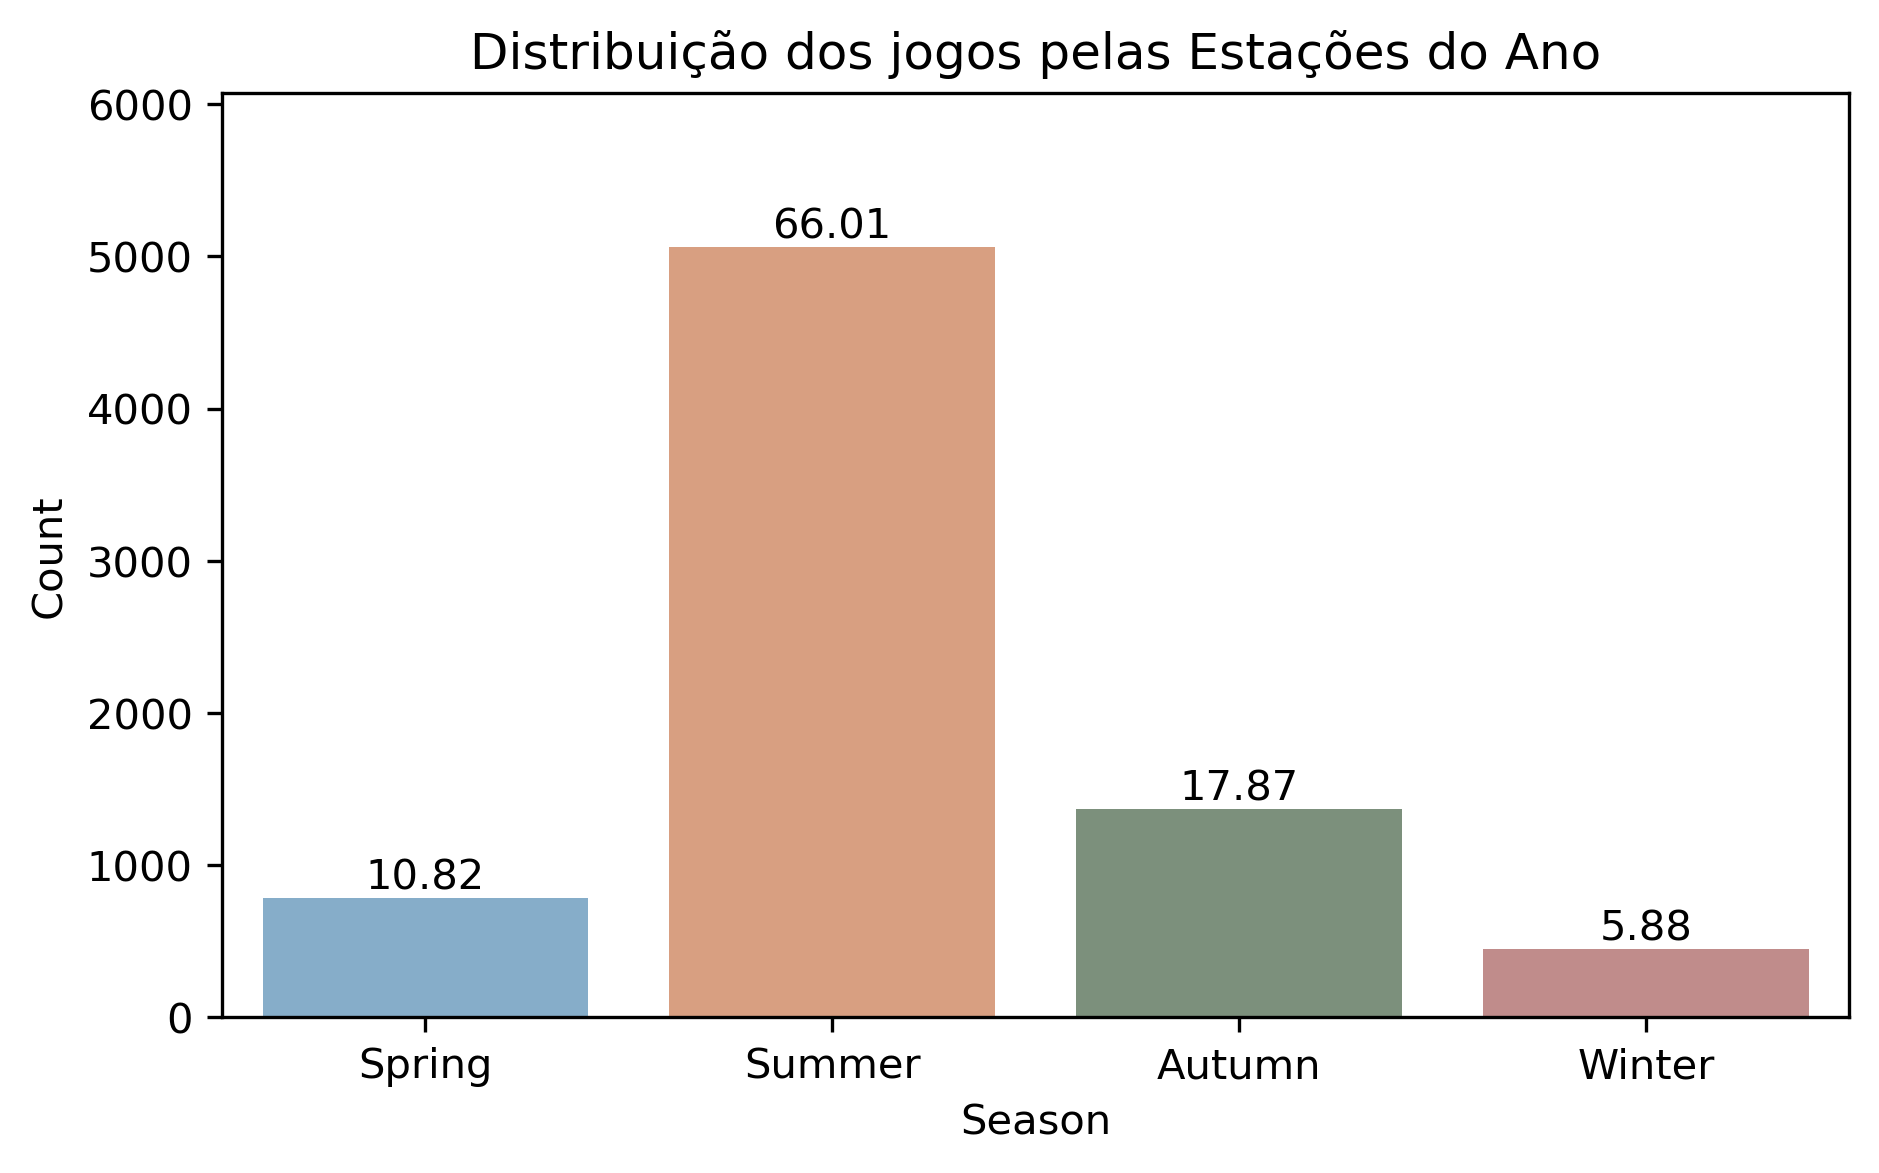

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(7, 4), dpi=300)

cores = ['#7BAFD4', '#E79B72', '#799379', '#C98482']

ax = sns.countplot(x='Season', data=df_copy, palette=cores)

# Valores para os labels (mesmo tamanho que o número de barras)
arr = np.array([10.82, 66.01, 17.87, 5.88])

# Obter as barras do gráfico
bars = ax.patches

# Adicionar os labels no topo de cada barra
for bar, label in zip(bars, arr):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,  # posição
            f'{label:.2f}', ha='center', va='bottom')

max_count = df_copy['Season'].value_counts().max()
plt.ylim(0, max_count * 1.2)

plt.title("Distribuição dos jogos pelas Estações do Ano")
plt.xlabel("Season")
plt.ylabel("Count")

plt.show()

In [149]:
df_copy.head()

,player1Name,player2Name,player1Height,player2Height,player1Hand,player2Hand,player1Backhand,player2Backhand,player1Born,player2Born,...,start,end,ground,prize,Score,Sets,LastScore,BestOf,days,Season
0,Christian Miniussi,Simon Youl,185,185,Right,Right,Unknown,Unknown,Argentina,Australia,...,1989-05-15,1989-05-21,Clay,"$75,000",36 61 63,3,63,3,6,Spring
2,Cyril Suk,Mansour Bahrami,180,178,Right,Right,Unknown,Unknown,Czech Republic,Iran,...,1989-05-15,1989-05-21,Clay,"$75,000",57 63 62,3,62,3,6,Spring
3,Eric Winogradsky,Gustavo Giussani,188,180,Right,Right,Unknown,Unknown,France,Argentina,...,1989-05-15,1989-05-21,Clay,"$75,000",60 75,2,75,3,6,Spring
4,Eric Winogradsky,Michael Tauson,188,193,Right,Right,Unknown,Unknown,France,Denmark,...,1989-05-15,1989-05-21,Clay,"$75,000",76 36 63,3,63,3,6,Spring
5,Eric Winogradsky,Nicklas Kulti,188,191,Right,Right,Unknown,Unknown,France,Sweden,...,1989-05-15,1989-05-21,Clay,"$75,000",76 63,2,63,3,6,Spring


#### O que fazer com o Prize?

- Transformar a variável em numérica;
- Avaliar se nos surgem problemas e tratar deles.

In [151]:
prize_int = [0 if len(prize) == 0 else int(prize.replace('$', '').replace(',', '')) for prize in df_copy.prize]
df_copy['prizeInt'] = prize_int

In [152]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 0 to 10893
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player1Name       7667 non-null   object 
 1   player2Name       7667 non-null   object 
 2   player1Height     7667 non-null   int64  
 3   player2Height     7667 non-null   int64  
 4   player1Hand       7667 non-null   object 
 5   player2Hand       7667 non-null   object 
 6   player1Backhand   7667 non-null   object 
 7   player2Backhand   7667 non-null   object 
 8   player1Born       7667 non-null   object 
 9   player2Born       7667 non-null   object 
 10  player1Continent  7667 non-null   object 
 11  player2Continent  7667 non-null   object 
 12  player1Age        7205 non-null   float64
 13  player2Age        7269 non-null   float64
 14  player1Rank       7667 non-null   int64  
 15  player2Rank       7667 non-null   int64  
 16  GameRound         7667 non-null   object 

In [153]:
df_copy[df_copy['prizeInt'] == 0].shape

(0, 29)

In [154]:
round(df_copy.describe(include=[np.int64, np.int32]), 2)

,player1Height,player2Height,player1Rank,player2Rank,Sets,BestOf,days,prizeInt
count,7667.00,7667.00,7667.00,7667.00,7667.00,7667.00,7667.00,7667.00
mean,155.05,139.45,369.16,484.98,2.34,3.01,6.09,254273.72
std,68.35,79.60,363.09,460.43,0.48,0.14,1.18,403166.74
min,0.00,0.00,1.00,1.00,2.00,3.00,0.00,10000.00
25%,178.00,170.00,80.00,106.00,2.00,3.00,6.00,10000.00
50%,183.00,183.00,245.00,324.00,2.00,3.00,6.00,50000.00
75%,188.00,188.00,565.00,765.00,3.00,3.00,6.00,400000.00
max,211.00,211.00,2129.00,2233.00,5.00,5.00,20.00,2296490.00


Temos `147` jogos pertencentes a campeonatos que supostamente não têm prêmios, o que podemos fazer é substituir pela média ao excluirmos estes valores de modo a não precisarmos excluir mais valores dado que os que serão excluídos em breve já vão reduzir muito os nossos dados e poderemos já estar em risco de ter dados em falta.

**Com os novos dados isto não se verifica!**

In [156]:
# df_copy.loc[df_copy['prizeInt'] == 0, 'prizeInt'] = int(df_copy.loc[df_copy['prizeInt'] != 0, 'prizeInt'].mean())

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
%%capture
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

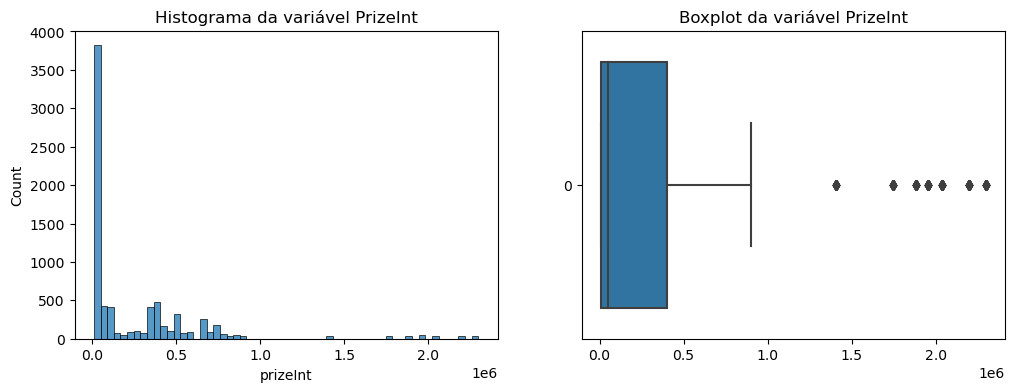

In [159]:
sns.histplot(df_copy['prizeInt'], ax=axes[0])
sns.boxplot(df_copy['prizeInt'], orient='h', ax=axes[1])

axes[0].set_title("Histograma da variável PrizeInt")
axes[1].set_title("Boxplot da variável PrizeInt")
fig

In [160]:
df_copy.columns

Index(['player1Name', 'player2Name', 'player1Height', 'player2Height',
       'player1Hand', 'player2Hand', 'player1Backhand', 'player2Backhand',
       'player1Born', 'player2Born', 'player1Continent', 'player2Continent',
       'player1Age', 'player2Age', 'player1Rank', 'player2Rank', 'GameRound',
       'tournament', 'start', 'end', 'ground', 'prize', 'Score', 'Sets',
       'LastScore', 'BestOf', 'days', 'Season', 'prizeInt'],
      dtype='object')

In [161]:
# df_copy = df_copy.loc[df_copy['BestOf'] == 3,] -- foi analisado mais a frente a sobrerepresentação dos resgistos BestOf 5 

In [162]:
# os nomes dos jogadores não são relevantes, mas sim as suas caracteristicas e, também porque não seria fazivel o estudo dessas variáveis (Não faz muito sentido contarmos com os nomes dos jogadores dado que eles não dizem nada sobre os jogadores em si. E por outro lado são demasiadas classes para uma única variável nominal.)
# os paises sao bastante categorias pelo que foi criada a variavel dos continentes
# a partir das datas de inicio dos jogos foi atribuida a respetiva estaçao e tambem a duraçao do respetivo torneio em que ocorreu o jogo
# e por fim a variavel score e lastScore nao sao relevantes mas sim o numero de sets em Sets
df_copy = df_copy.drop(['player1Name', 'player2Name', 'player1Born', 'player2Born', 'start', 'end', 'prize', 'Score', 'LastScore'], axis=1)
df_copy.columns

Index(['player1Height', 'player2Height', 'player1Hand', 'player2Hand',
       'player1Backhand', 'player2Backhand', 'player1Continent',
       'player2Continent', 'player1Age', 'player2Age', 'player1Rank',
       'player2Rank', 'GameRound', 'tournament', 'ground', 'Sets', 'BestOf',
       'days', 'Season', 'prizeInt'],
      dtype='object')

In [163]:
df_copy = df_copy.rename({'prizeInt': 'prize'}, axis=1)
df_copy.columns

Index(['player1Height', 'player2Height', 'player1Hand', 'player2Hand',
       'player1Backhand', 'player2Backhand', 'player1Continent',
       'player2Continent', 'player1Age', 'player2Age', 'player1Rank',
       'player2Rank', 'GameRound', 'tournament', 'ground', 'Sets', 'BestOf',
       'days', 'Season', 'prize'],
      dtype='object')

In [164]:
df_withoutNull = df_copy.loc[(df_copy['player1Height'] != 0) & (df_copy['player2Height'] != 0),].copy()
df_withNull = df_copy.copy()

Foram criados dois dataframes, um excluindo todos os registos em que qualquer um dos jogadores tenha a altura nula e o outro mantendo estes registos.

In [166]:
df_withoutNull.shape

(5250, 20)

In [167]:
df_withNull.shape

(7667, 20)

In [168]:
df_withNull.loc[df_withNull['player1Height'] == 0, 'player1Height'] = int(df_withNull.loc[df_withNull['player1Height'] != 0, 'player1Height'].mean())
df_withNull.loc[df_withNull['player2Height'] == 0, 'player2Height'] = int(df_withNull.loc[df_withNull['player2Height'] != 0, 'player2Height'].mean())

Para o dataframe com as alturas nulas mantidas foi imputada a média de alturas com estas observações excluídas.

In [170]:
value_counts(df_withNull)

----------------------------------------
Coluna: player1Height | Quant. 21
----------------------------------------
184    1239
183    1059
180     985
185     906
188     863
191     626
178     485
193     404
175     332
196     251
198     176
173     114
170      85
203      46
201      43
168      16
211      12
176      10
163       8
208       5
181       2
Name: player1Height, dtype: int64
----------------------------------------
Coluna: player2Height | Quant. 20
----------------------------------------
184    1877
183    1002
180     848
185     843
188     785
191     608
178     413
175     335
193     301
196     226
173     138
198     105
170      79
201      38
203      30
168      21
208       6
211       6
181       5
176       1
Name: player2Height, dtype: int64
----------------------------------------
Coluna: player1Hand | Quant. 3
----------------------------------------
Right      5795
Left       1110
Unknown     762
Name: player1Hand, dtype: int64
---------------

In [171]:
df_withoutNull.to_csv("withoutNull.csv", index=False)
df_withNull.to_csv("withNull.csv", index=False)

Os dataframes gerados foram transformados em csv para futuros tratamentos.

In [173]:
# pd.read_csv("atpWithFirstHandle.csv").head()
# pd.read_csv("atpWithoutHandle.csv").head()

Não faz muito sentido contarmos com os nomes dos jogadores dado que eles não dizem nada sobre os jogadores em si. E por outro lado são demasiadas classes para uma única variável nominal.